


# Model Development and Evaluation




## Objectives




Develop prediction models


<h4>Setup</h4>


 Import libraries:


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Load the data and store it in dataframe `df`:


In [2]:
file_path="/Users/macbook/Documents/CarsDataset-Analytics/2. Data_Wrangling/clean_df.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-of-std,aspiration-of-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,8.703704,13495.0,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,8.703704,16500.0,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19.0,9.038462,16500.0,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24.0,7.833333,13950.0,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18.0,10.681818,17450.0,Low,False,True,True,False


Drop redundant columns 

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## 1. Model Development

### Before training, we should split our data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

In [6]:
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

<h3>1.1 Single Linear Regression</h3>


Create the linear regression object

In [8]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-L/100km" help us predict car price?</h4>


Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


Fit the linear model using highway-mpg using training data:


In [9]:
lm.fit(x_train[['highway-L/100km']], y_train)

LinearRegression()

#### Predict output based on x_train and x_test

In [10]:
y_train_hat = lm.predict(x_train[['highway-L/100km']])
y_test_hat = lm.predict(x_test[['highway-L/100km']]) 

#### Now we caculate R^2 score for each data sets (training and testing).

In [11]:
r2_train = r2_score(y_train, y_train_hat)
r2_test = lm.score(x_test[['highway-L/100km']], y_test)

In [12]:
tabular = pd.DataFrame([[r2_train], [r2_test]], index=['training', 'testing'], columns=['r2'])
tabular

,r2
training,0.650313
testing,0.593701


#### Apply Cross Validation with 4 folds 

In [16]:
R2_score_list = cross_val_score(lm, x[['highway-L/100km']], y, cv=4)
print("The mean of the folds are", R2_score_list.mean(), "and the standard deviation is" , R2_score_list.std())

The mean of the folds are 0.5580343186130415 and the standard deviation is 0.15512883111455886


<h3>1.2 Multiple Linear Regression</h3>


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-L/100km</li>
</ul>
Let's develop a model using these variables as the predictor variables.


Fit the linear model using the four above-mentioned variables.


In [17]:
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)

LinearRegression()

#### Predict output based on training and testing data


In [18]:
y_train_hat = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
y_test_hat = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])


#### Now we caculate R^2 score for each data sets (training and testing).

In [19]:
r2_train = r2_score(y_train, y_train_hat)
r2_test = lm.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)

In [20]:
tabular1 = pd.DataFrame([[r2_train], [r2_test]], index=['training', 'testing'], columns=['r2'])
tabular1

,r2
training,0.824113
testing,0.738741


#### Apply Cross Validation with 4 folds 

In [21]:
r2_score_list = cross_val_score(lm, x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y, cv=4)
print("The mean of the folds are", R2_score_list.mean(), "and the standard deviation is" , R2_score_list.std())

The mean of the folds are 0.5580343186130415 and the standard deviation is 0.15512883111455886


<h3>1.3 Poly Regression</h3>


#### Develop model on Polynomial regression to see whether it's more fit our data than Linear Regression or not?

#### Using PolynomialFeatures()

In [22]:
p = PolynomialFeatures(degree=2)
x_train_poly = p.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
x_test_poly = p.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

In [23]:
lm = LinearRegression()
lm.fit(x_train_poly, y_train)
y_train_hat = lm.predict(x_train_poly)
y_test_hat = lm.predict(x_test_poly)

In [24]:
r2_train = r2_score(y_train, y_train_hat)
r2_test = r2_score(y_test, y_test_hat)

#### Convert these indicator to dataframe

In [26]:
tabular2 = pd.DataFrame([[r2_train], [r2_test]], index=['training', 'testing'], columns=['r2'])
tabular2

,r2
training,0.865192
testing,0.769031


#### Apply Cross Validation with 4 folds 

In [27]:
x_poly = p.fit_transform(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
r2_score_list = cross_val_score(lm, x_poly, y, cv=4)
print("The mean of the folds are", R2_score_list.mean(), "and the standard deviation is" , R2_score_list.std())

The mean of the folds are 0.5580343186130415 and the standard deviation is 0.15512883111455886


<h2>2. Ridge Regression  </h2>


### 2.1 Ridge Regression for MLR

Create and fit a Ridge regression object using the training data, set the regularization parameter from 0.001 to 1, and calculate the Squared-R using the test data.

In [28]:
from sklearn.linear_model import Ridge

In [38]:
Rsqu_test = []
Alpha = np.arange(0.001,1,0.001)
for alpha in Alpha:
    Ridgemodel = Ridge(alpha=alpha)
    Ridgemodel.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)
    test_score = Ridgemodel.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)
    Rsqu_test.append(test_score)


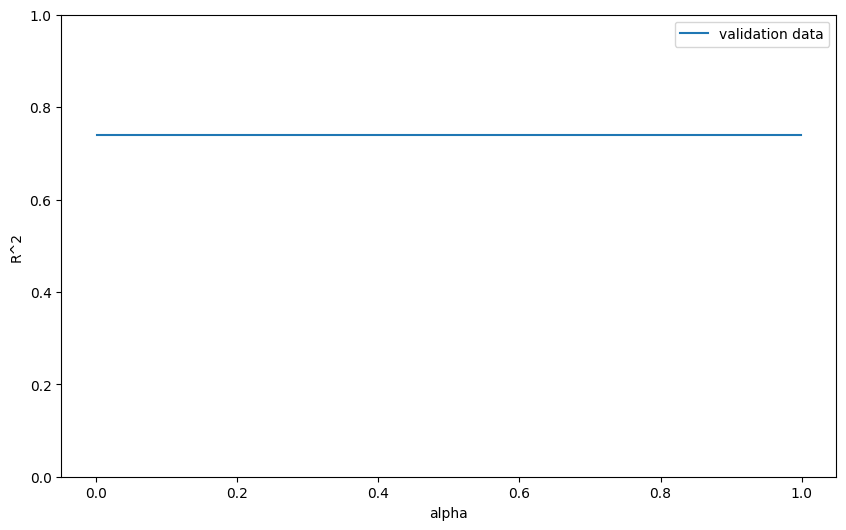

In [39]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

### 2.1 Ridge Regression for Poly Features

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.5, and calculate the R^2 utilising the test data provided. 


In [40]:
Rsqu_test = []
Alpha = np.arange(0.001,1,0.001)
for alpha in Alpha:
    Ridgemodel = Ridge(alpha=alpha)
    p = PolynomialFeatures(degree=2)
    x_train_poly = p.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
    x_test_poly = p.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
    Ridgemodel.fit(x_train_poly, y_train)
    Rsqu_test.append(Ridgemodel.score(x_test_poly, y_test))




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.99323e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.39865e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.09797e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.79729e-18): result may not be acc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.51756e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.5875e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.65743e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.72736e-17): result may not be accu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.45472e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.59459e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.66452e-17): result may not be acc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.11215e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.18208e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.25202e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.32195e-17): result may not be acc

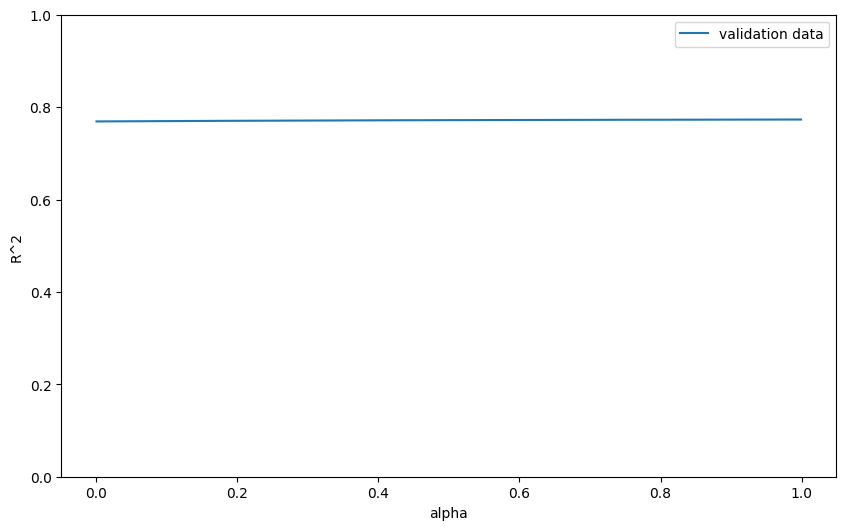

In [41]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()